<a href="https://colab.research.google.com/github/AmiraAmr99/recommendation_engine/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path)

# Data Preprocessing

In [ ]:
sample_df = df.copy()

# Remove duplicates
sample_df = sample_df.drop_duplicates()

# Drop nulls
sample_df.dropna(inplace=True)

# include only purchase transactions 
df_pur = sample_df.loc[sample_df.event_type == 'purchase']


In [ ]:
basket = df_pur.groupby(['user_session','product_id'])['product_id'].count().unstack().reset_index().fillna(0).set_index('user_session')

#converting all positive vaues to 1 and everything else to 0
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
basket = basket.applymap(hot_encode)
basket

product_id,5395,8372,8373,24330,24331,24332,24333,24334,24335,24336,...,5901870,5901871,5901872,5901873,5901987,5902675,5904212,5905638,5907079,5907080
user_session,,,,,,,,,,,,,,,,,,,,,
000a5db1-3002-4ede-82de-242c1c68dc64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000f9933-fcdb-23be-1ab7-94c29fb834ae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001c34fe-95d7-48e5-aa4b-d98708d548fc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00212299-8eb6-4035-a1ed-cd6a3502b7ae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002dc972-d167-429c-90fe-c6dbe76b9fbb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd66b4b-4e12-4658-8dbb-864703430edf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffd8e1ff-eb10-4f66-be90-454c1a58dfda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffe2ee5c-2b63-46f8-b7bd-090e9f0b4966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training Model

In [ ]:
# Calculate the itemsets using the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True) # Recommended min_support is 0.6
frequent_itemsets.tail(10)

,support,itemsets
40,0.011765,(5901861)
41,0.016624,(5901987)
42,0.011509,"(5743974, 5749198)"
43,0.012532,"(5743974, 5749199)"
44,0.011253,"(5766980, 5743974)"
45,0.011253,"(5766980, 5749198)"
46,0.022762,"(5766980, 5749199)"
47,0.012788,"(5775814, 5749199)"
48,0.013043,"(5766980, 5775814)"
49,0.011253,"(5766980, 5788783)"


In [ ]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.03)

# Filter the rules to show only those with a high lift value
rules = rules[rules['lift'] > 0]

# Print the top 10 frequently purchased product combinations
my_rules = rules.sort_values('lift', ascending=False)
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5743974),(5749198),0.041944,0.044757,0.011509,0.274390,6.130662,0.009632,1.316469
1,(5749198),(5743974),0.044757,0.041944,0.011509,0.257143,6.130662,0.009632,1.289691
14,(5766980),(5788783),0.075448,0.029668,0.011253,0.149153,5.027469,0.009015,1.140431
15,(5788783),(5766980),0.029668,0.075448,0.011253,0.379310,5.027469,0.009015,1.489557
10,(5775814),(5749199),0.036829,0.072379,0.012788,0.347222,4.797311,0.010122,1.421037
11,(5749199),(5775814),0.072379,0.036829,0.012788,0.176678,4.797311,0.010122,1.169860
13,(5775814),(5766980),0.036829,0.075448,0.013043,0.354167,4.694209,0.010265,1.431565
12,(5766980),(5775814),0.075448,0.036829,0.013043,0.172881,4.694209,0.010265,1.164490
9,(5749199),(5766980),0.072379,0.075448,0.022762,0.314488,4.168294,0.017301,1.348703
8,(5766980),(5749199),0.075448,0.072379,0.022762,0.301695,4.168294,0.017301,1.328390


<Axes: ylabel='lift'>

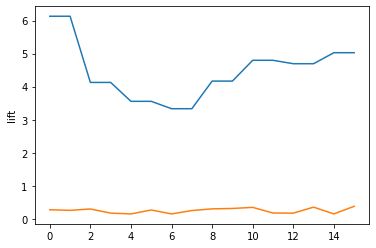

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=my_rules.index,y=my_rules.lift,data=my_rules)
sns.lineplot(x=my_rules.index,y=my_rules.confidence,data=my_rules)

